# Notebook for processing and plotting Cardenas Basalts and Unkar Intrusions related geocheical attributes

## import python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import pyrolite 
from pyrolite.util.classification import TAS
from pyrolite.plot import pyroplot

from pyrolite.geochem.ind import REE
from pyrolite import geochem
from pyrolite.geochem.norm import get_reference_composition, all_reference_compositions
%matplotlib inline
%config InlineBackend.figure_format='retina'

## import major and trace element geochemical data

Larson et al., 1994 developed major and trace lement geochemical data from the Cardenas Basalt mainly in the area near Basalt Canyon (Ochoa Point 0.7 km southwest of Basalt Canyon, Basalt Cliffs 1.5 km west of Ochoa Point)

Hendircks 1989 developed comprehensive volcanistratigraphy at Basalt Canyon but developed major element geochemical data from dikes within the Unkar Group, with the goal if investigating the feeder relationship between the intrusives and the lava flows. 

In [2]:
Larson1994_major_data = pd.read_csv('../data/geochem/Larson1994a_major.csv')
Larson1994a_trace_data = pd.read_csv('../data/geochem/Larson1994a_trace.csv')

Hendricks1989a_major_data = pd.read_csv('../data/geochem/Hendricks1989a_major.csv')


In [3]:
Hendricks1989a_major_data

,contact,sample,name,SiO2,Al2O3,Fe2O3,FeO,MgO,CaO,Na2O,K2O,TiO2,P2O5,MnO,H2O+,H2O-,CO2,Total
0,upper,HN7,Hance sill,44.6,14.84,2.44,8.15,6.94,13.64,1.87,1.37,1.89,0.48,0.55,2.85,0.38,0.12,100.12
1,lower,CC13,Clear Creek sill,47.0,16.10,3.31,7.46,6.12,8.78,2.72,1.10,2.30,0.33,0.13,2.42,0.53,2.08,100.38
2,upper,BA5,Bright Angel sill,47.1,16.93,2.78,6.62,8.70,7.74,2.89,1.00,2.23,0.35,0.13,2.67,0.73,0.51,100.38
3,upper,CR12,Crystal Creek sill,43.2,16.49,2.78,5.74,8.89,4.87,2.83,3.04,2.51,0.39,0.14,4.17,0.69,4.53,100.27
4,lower,SH17,Shinumo Creek sill,45.5,16.49,5.48,6.03,7.33,4.87,3.28,1.91,2.59,0.40,0.14,3.71,0.97,1.72,100.42
5,upper,TP4,Tapeats Creek sill,48.0,15.72,4.04,7.60,6.16,8.48,3.85,1.07,2.64,0.41,0.21,1.05,0.53,0.12,99.88
6,dike,Tid1,Unkar dike,46.6,16.70,13.60,0.50,2.80,7.50,2.80,2.20,1.62,0.51,0.09,1.57,0.47,2.83,99.80
7,dike,Tid2,Unkar dike,48.1,16.10,10.90,2.88,5.10,5.90,2.70,1.90,1.67,0.51,0.09,1.99,0.56,1.49,99.90
8,0,dike,dike,66.1,14.90,3.38,0.50,3.20,0.66,1.42,7.66,0.65,0.18,0.02,1.38,0.32,0.02,100.39
9,3.7,dike,dike,65.7,15.60,2.94,0.60,3.08,0.52,1.02,7.89,0.61,0.18,0.02,1.52,0.34,0.02,100.04


In [4]:
Hendricks1989a_sills = Hendricks1989a_major_data[Hendricks1989a_major_data['name'].str.contains('sill')].reset_index(drop=1)
Hendricks1989a_lavas = Hendricks1989a_major_data[Hendricks1989a_major_data['name'].str.contains('Cardenas Basalt')].reset_index(drop=1)
Hendricks1989a_Unkar_dike = Hendricks1989a_major_data[Hendricks1989a_major_data['sample'].str.contains('Tid1|Tid2')].reset_index(drop=1)
Hendricks1989a_Shinumo_dike = Hendricks1989a_major_data[Hendricks1989a_major_data['sample'] == 'dike'].reset_index(drop=1)

In [5]:
Hendricks1989a_sills

,contact,sample,name,SiO2,Al2O3,Fe2O3,FeO,MgO,CaO,Na2O,K2O,TiO2,P2O5,MnO,H2O+,H2O-,CO2,Total
0,upper,HN7,Hance sill,44.6,14.84,2.44,8.15,6.94,13.64,1.87,1.37,1.89,0.48,0.55,2.85,0.38,0.12,100.12
1,lower,CC13,Clear Creek sill,47.0,16.10,3.31,7.46,6.12,8.78,2.72,1.10,2.30,0.33,0.13,2.42,0.53,2.08,100.38
2,upper,BA5,Bright Angel sill,47.1,16.93,2.78,6.62,8.70,7.74,2.89,1.00,2.23,0.35,0.13,2.67,0.73,0.51,100.38
3,upper,CR12,Crystal Creek sill,43.2,16.49,2.78,5.74,8.89,4.87,2.83,3.04,2.51,0.39,0.14,4.17,0.69,4.53,100.27
4,lower,SH17,Shinumo Creek sill,45.5,16.49,5.48,6.03,7.33,4.87,3.28,1.91,2.59,0.40,0.14,3.71,0.97,1.72,100.42
5,upper,TP4,Tapeats Creek sill,48.0,15.72,4.04,7.60,6.16,8.48,3.85,1.07,2.64,0.41,0.21,1.05,0.53,0.12,99.88


## TAS diagram

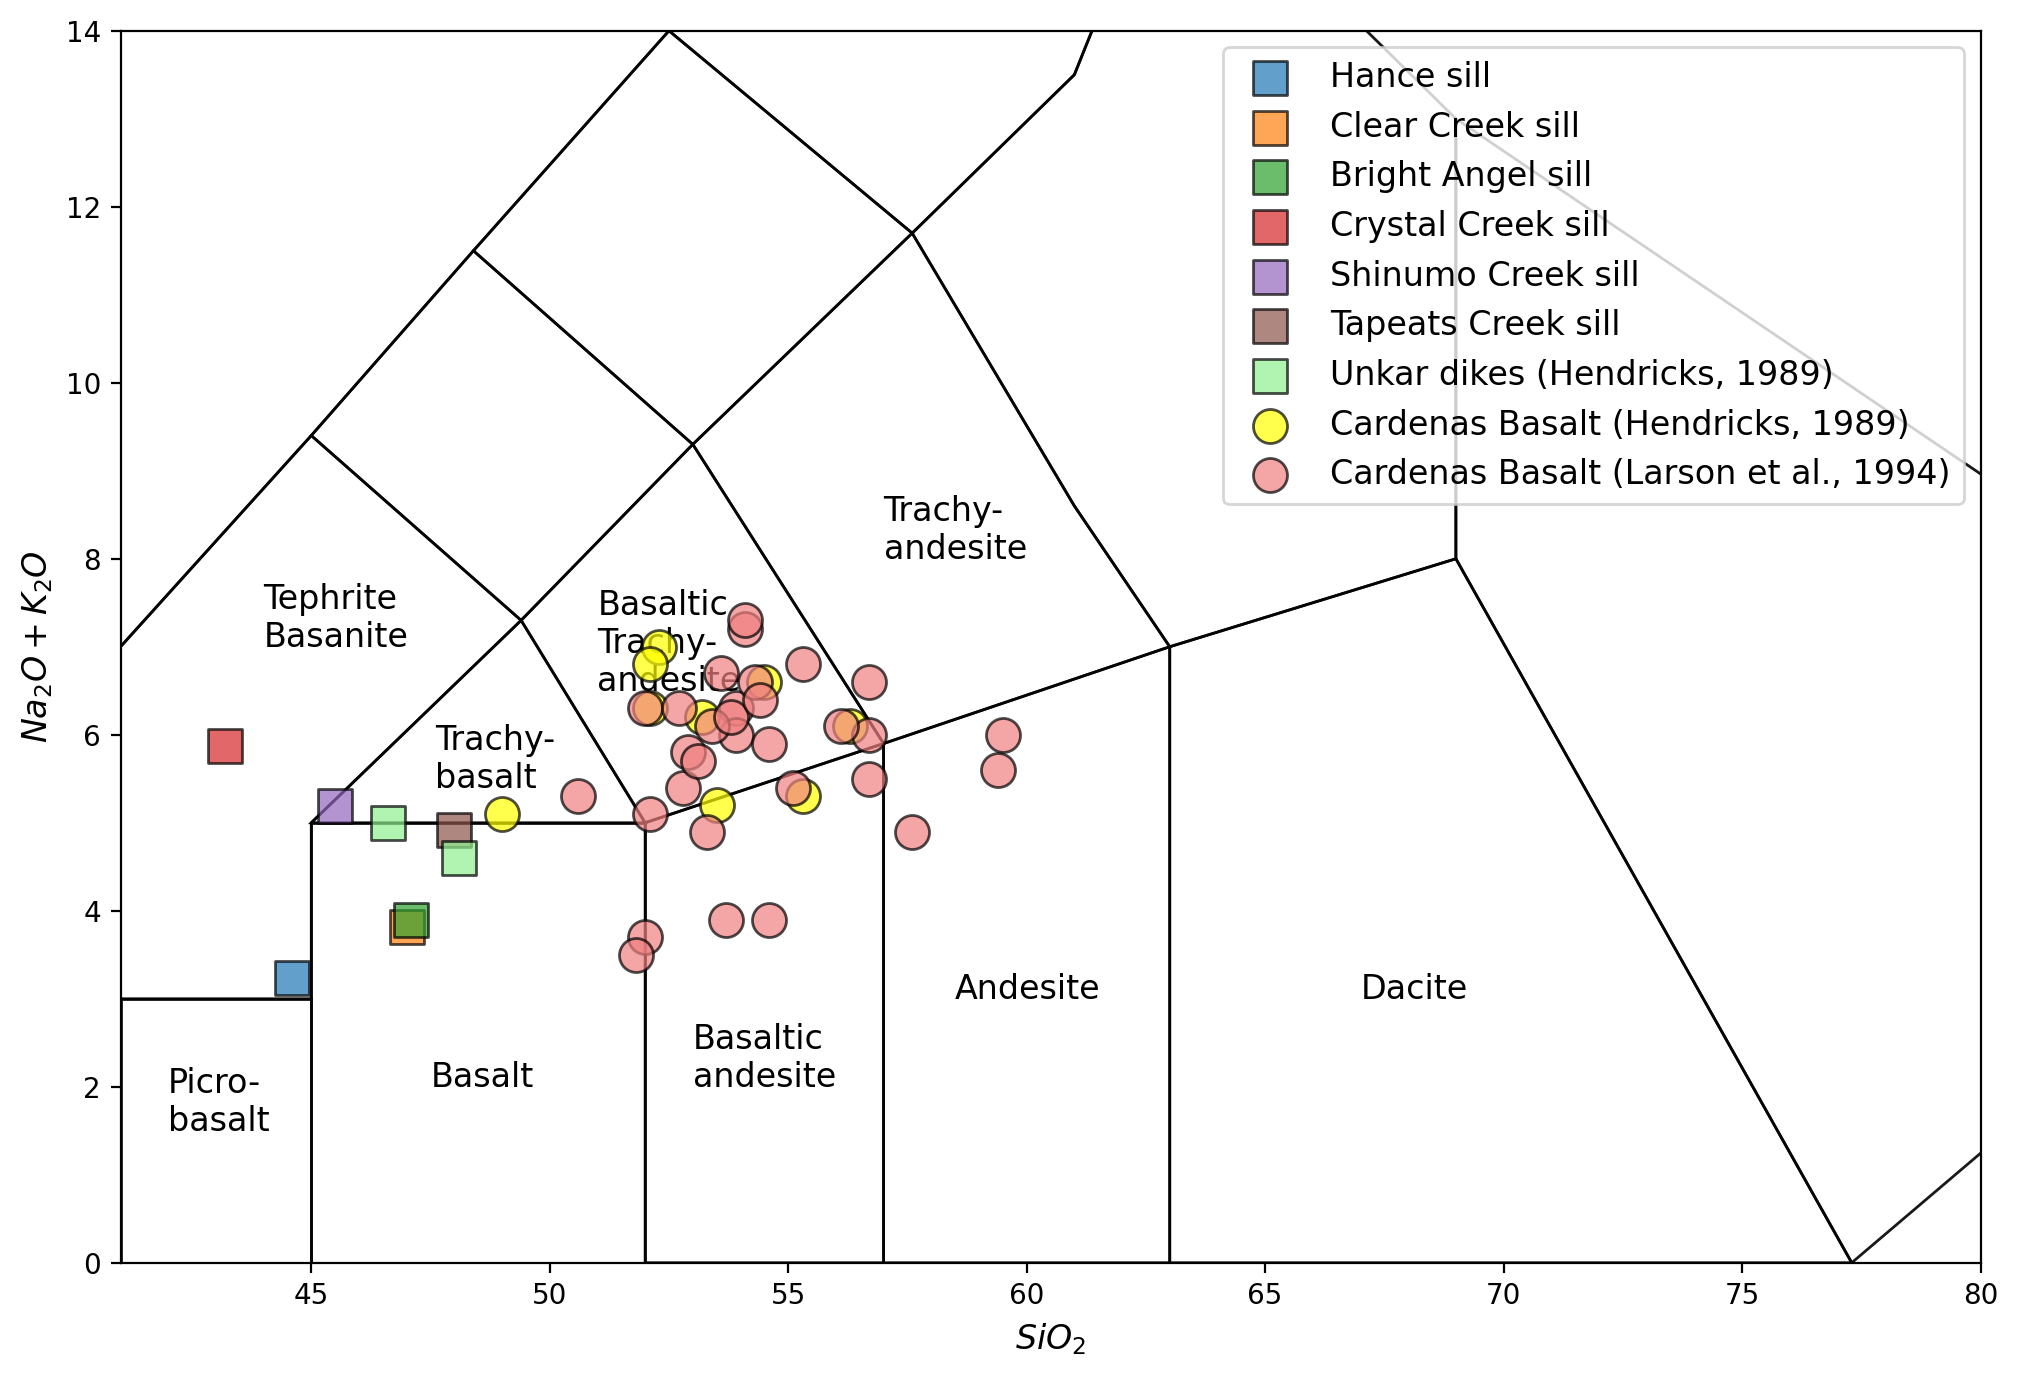

In [32]:
cm = TAS(which_model="LeMaitreCombined")
fig, ax = plt.subplots(1, figsize = (12,8))
# for i in range(Larson1994_major_data.shape[0]):
#     ax.scatter(Larson1994_major_data["SiO2"][i], Larson1994_major_data["Na2O"][i]+Larson1994_major_data['K2O'][i], 100,
#                    c= 'C0', marker = 'o',  edgecolor = 'black', alpha=0.9, 
#                label = Larson1994_major_data['No.'][i])

cm.add_to_axes(ax, alpha=0.9, zorder=1, add_labels=0, labels='volcanic')
for j in range(Hendricks1989a_sills.shape[0]):
    ax.scatter(Hendricks1989a_sills["SiO2"][j], Hendricks1989a_sills["Na2O"][j]+Hendricks1989a_sills['K2O'][j], 150,
                   c= 'C'+str(j), marker = 's',  zorder=100, edgecolor = 'black', alpha=0.7, label=Hendricks1989a_sills['name'][j])
ax.scatter(Hendricks1989a_Unkar_dike["SiO2"], Hendricks1989a_Unkar_dike["Na2O"]+Hendricks1989a_Unkar_dike['K2O'], 150,
                c= 'lightgreen', marker = 's',  zorder=100,  edgecolor = 'black', alpha=0.7, label = 'Unkar dikes (Hendricks, 1989)')

ax.scatter(Hendricks1989a_lavas["SiO2"], Hendricks1989a_lavas["Na2O"]+Hendricks1989a_lavas['K2O'], 150,
                   c= 'yellow', marker = 'o',  zorder=100, edgecolor = 'black', alpha=0.7, label='Cardenas Basalt (Hendricks, 1989)')

ax.scatter(Larson1994_major_data["SiO2"], Larson1994_major_data["Na2O"]+Larson1994_major_data['K2O'], 150,
                c= 'lightcoral', marker = 'o',  zorder=100,  edgecolor = 'black', alpha=0.7, label = 'Cardenas Basalt (Larson et al., 1994)')

ax.text(42, 1.5, 'Picro-\nbasalt', fontsize=12)
ax.text(47.5, 2, 'Basalt', fontsize=12)
ax.text(53, 2, 'Basaltic\nandesite', fontsize=12)
ax.text(58.5, 3, 'Andesite', fontsize=12)
ax.text(67, 3, 'Dacite', fontsize=12)

ax.text(44, 7, 'Tephrite\nBasanite', fontsize=12)
ax.text(47.6, 5.4, 'Trachy-\nbasalt', fontsize=12)
ax.text(51, 6.5, 'Basaltic\nTrachy-\nandesite', fontsize=12)
ax.text(57, 8, 'Trachy-\nandesite', fontsize=12)


plt.xlim(41,80)
plt.ylim(0,14)
plt.legend(ncol=1, loc='upper right', fontsize=12, frameon=True, facecolor='white')
plt.savefig('./code_output/Cardenas_Unkar_geochem_major.pdf', bbox_inches='tight')
plt.show()

## trace element diagram

In [77]:
Larson1994a_Hance = Larson1994a_trace_data[Larson1994a_trace_data['Flow No.'] == 'HANCE INT'].reset_index(drop=1)
Larson1994a_Cardenas = Larson1994a_trace_data[Larson1994a_trace_data['Flow No.'] != 'HANCE INT'].reset_index(drop=1)

In [79]:
chondrite = get_reference_composition("Chondrite_SM89")
CI = chondrite.set_units("ppm")
chondrite.comp.columns

Index(['Cs', 'Tl', 'Rb', 'Ba', 'W', 'Th', 'U', 'Nb', 'Ta', 'K', 'La', 'Ce',
       'Pb', 'Pr', 'Mo', 'Sr', 'P', 'Nd', 'F', 'Sm', 'Zr', 'Hf', 'Eu', 'Sn',
       'Sb', 'Ti', 'Gd', 'Tb', 'Dy', 'Li', 'Y', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'],
      dtype='object')

In [80]:
trace_elements = ['Ba', 'Rb', 'Th', 'Nb', 'Ta', 'La', 'Ce', 'Sr', 'Nd', 
                  'Sm', 'Zr', 'Hf', 'Tb', 'Y', 'Yb', 'Lu']
trace_elements_chondrite = ['Ba', 'Rb', 'Th', 'Nb', 'Ta', 'La', 'Ce', 'Sr', 'Nd',
                  'Sm', 'Zr', 'Hf', 'Tb', 'Y', 'Yb', 'Lu']

In [89]:
Larson1994a_Cardenas_bounds = Larson1994a_Cardenas[trace_elements].agg([min, max])/chondrite.comp[trace_elements_chondrite].values[0]
Larson1994a_Cardenas_bounds

,Ba,Rb,Th,Nb,Ta,La,Ce,Sr,Nd,Sm,Zr,Hf,Tb,Y,Yb,Lu
min,53.941909,6.465517,38.965517,32.520325,34.285714,42.194093,39.379085,14.049587,25.910064,23.594771,27.906977,25.515947,20.588235,22.929936,17.764706,15.551181
max,385.062241,44.827586,258.965517,48.780488,55.000000,125.316456,88.398693,58.402204,82.441113,54.509804,53.229974,56.097561,40.106952,43.949045,29.470588,23.228346


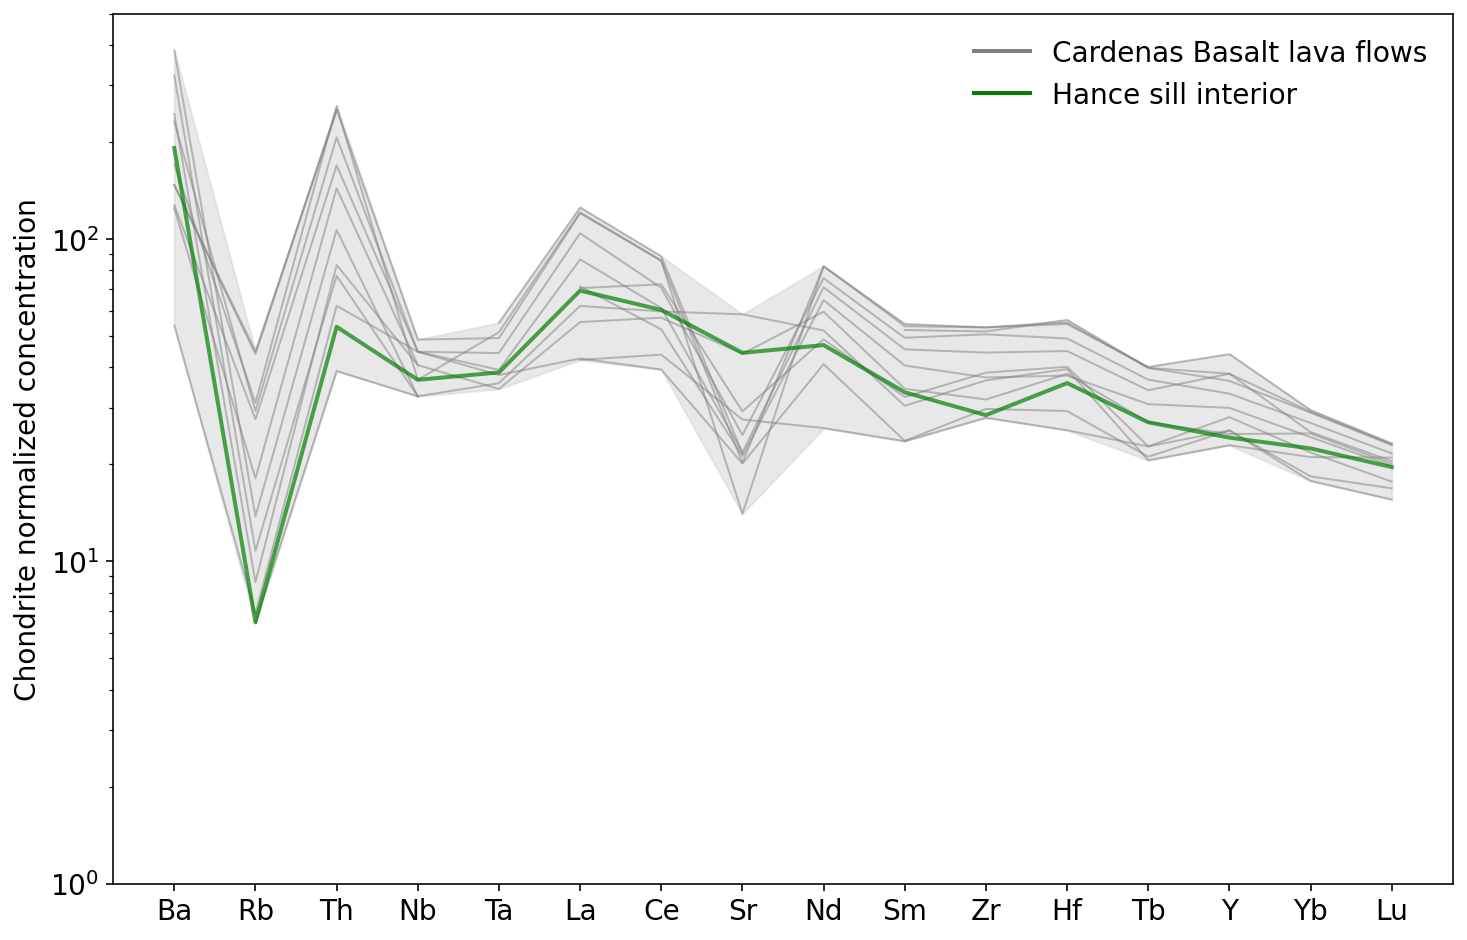

In [102]:
fig, ax = plt.subplots(1, figsize = (12, 8))

for i in range(Larson1994a_Cardenas.shape[0]):
    
    ax.plot(trace_elements, Larson1994a_Cardenas[trace_elements].iloc[i]/chondrite.comp[trace_elements_chondrite].values[0], 
            color = 'gray', lw=1, alpha=0.5)

ax.plot(trace_elements, Larson1994a_Hance[trace_elements].iloc[0]/chondrite.comp[trace_elements_chondrite].values[0], 
            color = 'green', lw=2, alpha=0.7, label='Hance sill interior')
ax.fill_between(trace_elements, Larson1994a_Cardenas_bounds.loc['max'], Larson1994a_Cardenas_bounds.loc['min'], color='lightgrey', alpha=0.5)
custom_lines = [Line2D([0], [0], color='gray', lw=2),
                Line2D([0], [0], color='green', lw=2)]

plt.yscale('log')
plt.ylim(1, 500)
plt.ylabel('Chondrite normalized concentration', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(custom_lines, ['Cardenas Basalt lava flows', 'Hance sill interior'], fontsize=14, loc='upper right')
plt.savefig('./code_output/Larson1994a_trace_elements.pdf', bbox_inches='tight')
plt.show()